<a href="https://colab.research.google.com/github/jen4win/100-days-of-code/blob/master/Diabetes_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diabetes toy dataset and the incorporation of Linear Regression and Lasso Regularization

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn import datasets

In [4]:
diabetes = datasets.load_diabetes()
X = diabetes.data
Y = diabetes.target

In [56]:
df = pd.DataFrame(X, columns = diabetes.feature_names)
target = Y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [58]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state = 30, test_size= 0.1)

Now, it is obvious that the data has already been scaled. With a look into the sklearn documentation, it is said, that the data is mean-centered and scaled by the standard deviation times square root of n_samples.

In [60]:
# check type of the variables
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 190 to 293
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     397 non-null    float64
 1   sex     397 non-null    float64
 2   bmi     397 non-null    float64
 3   bp      397 non-null    float64
 4   s1      397 non-null    float64
 5   s2      397 non-null    float64
 6   s3      397 non-null    float64
 7   s4      397 non-null    float64
 8   s5      397 non-null    float64
 9   s6      397 non-null    float64
dtypes: float64(10)
memory usage: 34.1 KB


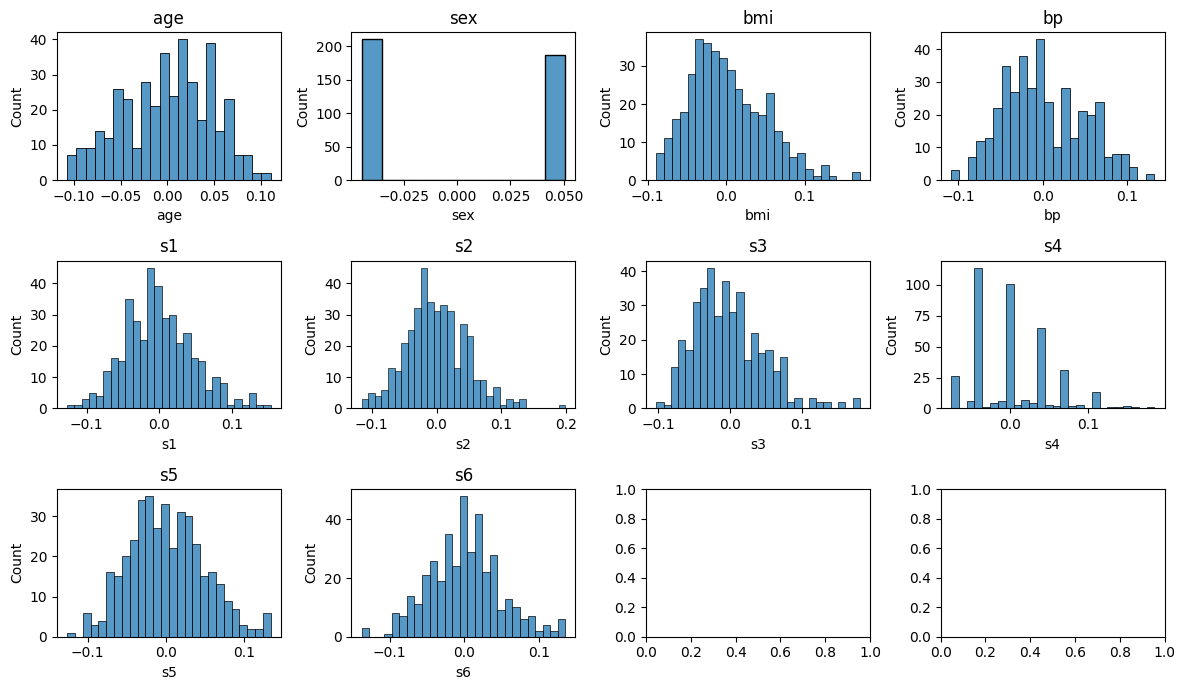

In [61]:
# check distribution of the variables
#columns = diabetes.feature_names
fig, ax = plt.subplots(nrows=3, ncols = 4, figsize = (12,7))
ax = ax.flatten()
for i, c in enumerate(diabetes.feature_names):
    sns.histplot(X_train[c], binwidth=0.01, ax=ax[i])
    ax[i].set_title(c)
plt.tight_layout()



In [62]:
# check for missing values
X_train.isna().any().sum()

0

<Axes: >

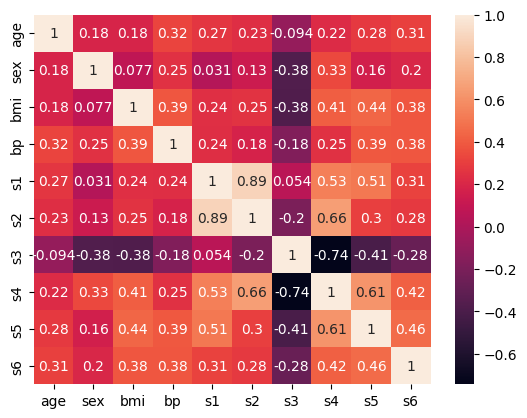

In [63]:
# check for correlation
columns = diabetes.feature_names
corr_mtrx = X_train[columns].corr()
sns.heatmap(corr_mtrx, annot = True)

S3 is strongly correlated with S4 and moderately with S5, sex and bmi. So one of them should be excluded in the modelling.

Let's start with the three parameters bmi, age and sex and check for their rmse.

In [105]:
# select features
selection = ['bmi', 'age', 'sex']
X_train_selected = X_train[selection]
X_test_selected = X_test[selection]

In [106]:
lr = LinearRegression()
lr.fit(X_train_selected, y_train)
y_pred_bmi_age_sex = lr.predict(X_test_selected)

In [104]:
mse_bmi_age = mean_squared_error(y_test, y_pred_bmi_age)
rmse_bmi_age = mse_bmi_age**(0.5)
rmse_bmi_age

64.08528153397174

In [107]:
mse_bmi_age_sex = mean_squared_error(y_test, y_pred_bmi_age_sex)
rmse_bmi_age_sex = mse_bmi_age_sex**(0.5)
rmse_bmi_age_sex

64.33898707337752

In [101]:
mse_bmi = mean_squared_error(y_test, y_pred_bmi)
rmse_bmi = mse_bmi**(0.5)
rmse_bmi

63.45848375908898

As the results of all three models are quite similar, none of the variables adds much more explainability to the target. So the **lasso regularization** method is used to have a first feature selection.

A quite tough value for alpha is chosen (0.5) to get a strong reduction on the number of features.

In [92]:
lasso_05 = Lasso(alpha = 0.5)
lasso_05.fit(X_train, y_train)
y_pred_lasso_05 = lasso_05.predict(X_test)

In [95]:
mse_lasso_05 = mean_squared_error(y_test, y_pred_lasso_05)
rmse_lasso_05 = mse_lasso_05**(0.5)
rmse_lasso_05

60.49568748803807

In [93]:
lasso_05_coefficients = lasso_05.coef_
lasso_selected_features = np.array(df.columns)[lasso_05_coefficients != 0]
print('Lasso Regression with alpha = 0.5 selected the following features:',lasso_selected_features)

Lasso Regression with alpha = 0.5 selected the following features: ['bmi' 'bp' 's3' 's5']


In [ ]:
lasso_08 = Lasso(alpha = 0.8)
lasso_08.fit(X_train, y_train)
y_pred_lasso_08 = lasso_08.predict(X_test)

In [96]:
mse_lasso_08 = mean_squared_error(y_test, y_pred_lasso_08)
rmse_lasso_08 = mse_lasso_08**(0.5)
rmse_lasso_08

62.688268211708916

In [91]:
lasso_08_coefficients = lasso_08.coef_
lasso_selected_features = np.array(df.columns)[lasso_08_coefficients != 0]
print('Lasso Regression with alpha = 0.8 selected the following features:',lasso_selected_features)

Lasso Regression with alpha = 0.8 selected the following features: ['bmi' 'bp' 's5']


Compared to a linear regression the lasso regularization reduced the root mean squared error up to 4 units. Still the error is quite high with at least 60 units.

It is clear that the lasso regression with alpha 0.5 claims better results than a lasso regression with 0.8, which is thought to be more restrctive as it excludes even one more feature s3.

Further improvement could be made by k-best feature selection or a grid search for other hyperparmeters.